In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [3]:

uploaded_files = files.upload()

Saving preprocessed1.csv to preprocessed1.csv
Saving preprocessed2.csv to preprocessed2.csv
Saving preprocessed3.csv to preprocessed3.csv


In [ ]:
import pandas as pd

# Load the datasets
friends_episodes_df = pd.read_csv('Friends_episodes_data.csv')
emotional_arc_df = pd.read_csv('EmotionalArc&FCS.csv')

# Display the first few rows of each dataset for inspection
friends_episodes_df_head = friends_episodes_df.head()
emotional_arc_df_head = emotional_arc_df.head()

friends_episodes_df_head, emotional_arc_df_head


(   Unnamed: 0.1  Unnamed: 0     id  \
 0             0           0  85979   
 1             1           1  85981   
 2             2           2  85983   
 3             3           3  85987   
 4             4           4  85990   
 
                                                  job  \
 0  ['Director', 'Writer', 'Writer', 'Director of ...   
 1  ['Director', 'Director of Photography', 'Edito...   
 2  ['Director', 'Writer', 'Director of Photograph...   
 3  ['Writer', 'Writer', 'Director', 'Executive Pr...   
 4  ['Writer', 'Writer', 'Director', 'Director of ...   
 
                                        original_name  \
 0  ['James Burrows', 'Jeff Greenstein', 'Jeff Str...   
 1  ['James Burrows', 'Richard Hissong', 'Andy Zal...   
 2  ['James Burrows', 'Alexa Junge', 'Richard Hiss...   
 3  ['Marta Kauffman', 'David Crane', 'James Burro...   
 4  ['Marta Kauffman', 'David Crane', 'James Burro...   
 
                                           popularity    air_date  \
 0     

In [ ]:
# Ensure the key columns are of the same data type
friends_episodes_df['episode_number'] = friends_episodes_df['episode_number'].astype(float)
friends_episodes_df['season_number'] = friends_episodes_df['season_number'].astype(float)
emotional_arc_df['Episode'] = emotional_arc_df['Episode'].astype(float)
emotional_arc_df['Season'] = emotional_arc_df['Season'].astype(float)

# Merge the datasets on 'episode_number'/'Episode' and 'season_number'/'Season'
combined_df = pd.merge(friends_episodes_df, emotional_arc_df, left_on=['episode_number', 'season_number'], right_on=['Episode', 'Season'])

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)

In [ ]:
combined_df.head()

,Unnamed: 0.1_x,Unnamed: 0_x,id,job,original_name,popularity,air_date,episode_number,Title_x,overview,...,Unnamed: 0.2,Unnamed: 0.1_y,Unnamed: 0_y,text script,Title_y,Episode,Season,emotional_arc,top_3_itemsets,top_4_itemsets
0,0,0,85979,"['Director', 'Writer', 'Writer', 'Director of ...","['James Burrows', 'Jeff Greenstein', 'Jeff Str...","[5.803, 1.251, 0.84, 1.094, 1.62]",1994-11-17,9.0,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,...,8,8,8,"[Scene: Central Perk, Rachel is confronting he...",The One Where Underdog Gets Away,9.0,1.0,"[0.07101515151515152, 0.16596292596292594, 0.1...","[frozenset({'Ross', 'Rachel', 'Chandler'}), fr...","[frozenset({'Joey', 'Ross', 'Rachel', 'Chandle..."
1,1,1,85981,"['Director', 'Director of Photography', 'Edito...","['James Burrows', 'Richard Hissong', 'Andy Zal...","[5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]",1994-10-06,3.0,The One with the Thumb,Monica finds it difficult to break up with her...,...,2,2,2,"[Scene: Chandler and Joey's, Chandler is helpi...",The One With The Thumb,3.0,1.0,"[0.31382320447118234, 0.1014724873426382, -0.0...","[frozenset({'Monica', 'Ross', 'Rachel'}), froz...","[frozenset({'Monica', 'Ross', 'Rachel', 'Phoeb..."
2,2,2,85983,"['Director', 'Writer', 'Director of Photograph...","['James Burrows', 'Alexa Junge', 'Richard Hiss...","[5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80...",1994-10-13,4.0,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,...,3,3,3,"[Scene: Central Perk, Ross and Monica are watc...",The One With George Stephanopoulos,4.0,1.0,"[0.1044484812062937, 0.2427170052170053, 0.025...","[frozenset({'Ross', 'Rachel', 'Chandler'}), fr...","[frozenset({'Monica', 'Ross', 'Rachel', 'Chand..."
3,3,3,85987,"['Writer', 'Writer', 'Director', 'Executive Pr...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.368, 1.62, 1.686, 4.742...",1994-09-22,1.0,Pilot,An introduction to the gang. After Rachel leav...,...,0,0,0,"[Scene: The Subway, Phoebe is singing for\ncha...",The Pilot-The Uncut Version,1.0,1.0,"[0.12518315018315015, 0.24316202090592334, 0.0...","[frozenset({'Monica', 'Rachel', 'Chandler'}), ...","[frozenset({'Joey', 'Monica', 'Rachel', 'Chand..."
4,4,4,85990,"['Writer', 'Writer', 'Director', 'Director of ...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.094, 1.62]",1994-11-10,8.0,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,...,7,7,7,"[Scene: Monica and Rachel's, everyone is there...",The One Where Nana Dies Twice,8.0,1.0,"[0.11319867886178862, 0.12749017857142855, 0.2...","[frozenset({'Monica', 'Ross', 'Chandler'}), fr...","[frozenset({'Monica', 'Ross', 'Rachel', 'Chand..."


In [ ]:
# Remove columns that are unnamed
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]

# Remove the 'Title_y' column
combined_df.drop('Title_y', axis=1, inplace=True)

# Rename 'Title_x' to 'Title'
combined_df.rename(columns={'Title_x': 'Title'}, inplace=True)

# Display the first few rows to verify changes
print(combined_df.head())


      id                                                job  \
0  85979  ['Director', 'Writer', 'Writer', 'Director of ...   
1  85981  ['Director', 'Director of Photography', 'Edito...   
2  85983  ['Director', 'Writer', 'Director of Photograph...   
3  85987  ['Writer', 'Writer', 'Director', 'Executive Pr...   
4  85990  ['Writer', 'Writer', 'Director', 'Director of ...   

                                       original_name  \
0  ['James Burrows', 'Jeff Greenstein', 'Jeff Str...   
1  ['James Burrows', 'Richard Hissong', 'Andy Zal...   
2  ['James Burrows', 'Alexa Junge', 'Richard Hiss...   
3  ['Marta Kauffman', 'David Crane', 'James Burro...   
4  ['Marta Kauffman', 'David Crane', 'James Burro...   

                                          popularity    air_date  \
0                  [5.803, 1.251, 0.84, 1.094, 1.62]  1994-11-17   
1   [5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]  1994-10-06   
2  [5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80...  1994-10-13   
3  [5.777, 3

<ipython-input-7-570eab4ba438>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.drop('Title_y', axis=1, inplace=True)
<ipython-input-7-570eab4ba438>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.rename(columns={'Title_x': 'Title'}, inplace=True)


In [ ]:
df=combined_df

In [ ]:
import ast
import numpy as np

def extract_popularity(job_list_str, popularity_list_str, role):
    try:
        # Replace stylized single quotes (‘ and ’) with standard quotes (')
        job_list_str = job_list_str.replace('‘', "'").replace('’', "'")
        popularity_list_str = popularity_list_str.replace('‘', "'").replace('’', "'")

        # Convert string representations of lists to actual lists
        job_list = ast.literal_eval(job_list_str)
        popularity_list = ast.literal_eval(popularity_list_str)

        # Check if job_list and popularity_list are of the same length
        if len(job_list) != len(popularity_list):
            return np.nan  # Return NaN if lengths are inconsistent

        # Extract popularity for the specified role
        popularity_scores = [popularity_list[i] for i, job in enumerate(job_list) if role in job]

        if not popularity_scores:
            return np.nan  # Return NaN if no scores found for the role

        # Return the mean popularity for the role
        return np.mean(popularity_scores)

    except Exception as e:
        # Handle any exceptions
        print(f"Error processing row: {e}")
        return np.nan


In [ ]:
df['director_popularity'] = df.apply(lambda x: extract_popularity(x['job'], x['popularity'], 'Director'), axis=1)
df['writer_popularity'] = df.apply(lambda x: extract_popularity(x['job'], x['popularity'], 'Writer'), axis=1)

In [ ]:
df[['director_popularity','writer_popularity','job','popularity']]

,director_popularity,writer_popularity,job,popularity
0,3.4485,1.0455,"['Director', 'Writer', 'Writer', 'Director of ...","[5.803, 1.251, 0.84, 1.094, 1.62]"
1,3.4485,NaN,"['Director', 'Director of Photography', 'Edito...","[5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]"
2,3.4485,1.3880,"['Director', 'Writer', 'Director of Photograph...","[5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80..."
3,3.7445,4.7685,"['Writer', 'Writer', 'Director', 'Executive Pr...","[5.777, 3.76, 5.803, 1.368, 1.62, 1.686, 4.742..."
4,3.4485,4.7685,"['Writer', 'Writer', 'Director', 'Director of ...","[5.777, 3.76, 5.803, 1.094, 1.62]"
...,...,...,...,...
218,2.8430,1.3880,"['Director', 'Writer']","[2.843, 1.388]"
219,2.8430,1.3880,"['Director', 'Writer']","[2.843, 1.388]"
220,3.1890,2.3840,"['Director', 'Writer']","[3.189, 2.384]"
221,3.2430,1.6430,"['Director', 'Writer']","[3.243, 1.643]"


In [ ]:
df['director_popularity'] = df['director_popularity'].fillna(df['director_popularity'].median())
df['writer_popularity'] = df['writer_popularity'].fillna(df['writer_popularity'].median())

In [ ]:
df[['director_popularity','writer_popularity','job','popularity']]

TypeError: ignored

In [ ]:
df.drop('list_of_popularity', axis=1, inplace=True)

In [ ]:
df.head()

,id,air_date,Title,overview,vote_average,title_len,holiday_episode,sentiment,text script,emotional_arc,top_3_itemsets,top_4_itemsets,director_popularity,writer_popularity
0,85979,1994-11-17,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,8.043,32,0,-0.166667,"[Scene: Central Perk, Rachel is confronting he...","[0.07101515151515152, 0.16596292596292594, 0.1...","[frozenset({'Ross', 'Rachel', 'Chandler'}), fr...","[frozenset({'Joey', 'Ross', 'Rachel', 'Chandle...",3.4485,1.0455
1,85981,1994-10-06,The One with the Thumb,Monica finds it difficult to break up with her...,8.130,22,0,0.228571,"[Scene: Chandler and Joey's, Chandler is helpi...","[0.31382320447118234, 0.1014724873426382, -0.0...","[frozenset({'Monica', 'Ross', 'Rachel'}), froz...","[frozenset({'Monica', 'Ross', 'Rachel', 'Phoeb...",3.4485,1.7880
2,85983,1994-10-13,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,7.840,34,0,-0.133333,"[Scene: Central Perk, Ross and Monica are watc...","[0.1044484812062937, 0.2427170052170053, 0.025...","[frozenset({'Ross', 'Rachel', 'Chandler'}), fr...","[frozenset({'Monica', 'Ross', 'Rachel', 'Chand...",3.4485,1.3880
3,85987,1994-09-22,Pilot,An introduction to the gang. After Rachel leav...,7.081,5,0,0.300000,"[Scene: The Subway, Phoebe is singing for\ncha...","[0.12518315018315015, 0.24316202090592334, 0.0...","[frozenset({'Monica', 'Rachel', 'Chandler'}), ...","[frozenset({'Joey', 'Monica', 'Rachel', 'Chand...",3.7445,4.7685
4,85990,1994-11-10,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,7.837,29,0,0.114583,"[Scene: Monica and Rachel's, everyone is there...","[0.11319867886178862, 0.12749017857142855, 0.2...","[frozenset({'Monica', 'Ross', 'Chandler'}), fr...","[frozenset({'Monica', 'Ross', 'Rachel', 'Chand...",3.4485,4.7685


In [ ]:
import pandas as pd
import re
def extract_characters_from_script(script):
    # Regular expression pattern for character names
    # Matches words with first letter capitalized followed by a colon
    pattern = r'\b[A-Z][a-z]*\b(?=:)'

    # Find all matches in the script
    characters = re.findall(pattern, script)

    # Return unique character names
    return list(set(characters))

# Apply the function to each script in the DataFrame
df['extracted_characters'] = df['text script'].apply(extract_characters_from_script)

# Display the DataFrame to verify
print(df[['id', 'Title', 'extracted_characters']])

        id                               Title  \
0    85979    The One Where Underdog Gets Away   
1    85981              The One with the Thumb   
2    85983  The One with George Stephanopoulos   
3    85987                               Pilot   
4    85990       The One Where Nana Dies Twice   
..     ...                                 ...   
218  87442            The One with the Mugging   
219  87477           The One with the Boob Job   
220  87517         The One with Rachel's Dream   
221  87553          The One Where Ross Is Fine   
222  87529           The One with Ross's Grant   

                                  extracted_characters  
0    [Phoebe, Carol, Monica, Scene, Girl, Terry, Su...  
1    [Lizzie, Phoebe, Monica, Scene, Chandler, Guys...  
2    [Receptionist, Phoebe, Kiki, Monica, Scene, Ph...  
3    [Phoebe, Monica, Scene, Customer, Chandler, Ro...  
4    [Phoebe, Monica, Scene, Lillian, Chandler, Gel...  
..                                                 ...  


In [ ]:
from collections import Counter

# Assuming df is your DataFrame and 'extracted_characters' is your column
# Concatenate all character lists into one large list
all_characters = sum(df['extracted_characters'], [])

# Count the frequency of each character
character_counts = Counter(all_characters)

# Get the top 10 characters
top_15_characters = character_counts.most_common(35)

top_15_characters



[('Scene', 221),
 ('Ross', 206),
 ('Monica', 205),
 ('Chandler', 205),
 ('Joey', 205),
 ('Phoebe', 204),
 ('Rachel', 204),
 ('All', 109),
 ('Gunther', 48),
 ('Woman', 44),
 ('Guy', 27),
 ('Man', 21),
 ('Geller', 20),
 ('Director', 18),
 ('Mike', 18),
 ('Janice', 17),
 ('Nurse', 14),
 ('Carol', 13),
 ('Waiter', 13),
 ('Guys', 12),
 ('Emily', 12),
 ('Note', 12),
 ('Girl', 11),
 ('Both', 11),
 ('Doctor', 11),
 ('Susan', 10),
 ('Girls', 9),
 ('Voice', 9),
 ('Ben', 9),
 ('Julie', 8),
 ('Estelle', 8),
 ('Charlie', 8),
 ('Customer', 7),
 ('Ursula', 7),
 ('Waitress', 7)]

In [ ]:
# Provided data
character_counts = [
    ('Scene', 221),
    ('Ross', 206),
    ('Monica', 205),
    ('Chandler', 205),
    ('Joey', 205),
    ('Phoebe', 204),
    ('Rachel', 204),
    ('All', 109),
    ('Gunther', 48),
    ('Woman', 44),
    ('Guy', 27),
    ('Man', 21),
    ('Geller', 20),
    ('Director', 18),
    ('Mike', 18)
]

# Characters to remove
characters_to_remove = {'Scene', 'Guy', 'Man', 'Woman', 'All'}

# Filter the list
filtered_character_counts = [item[0] for item in character_counts if item[0] not in characters_to_remove]

filtered_character_counts


['Ross',
 'Monica',
 'Chandler',
 'Joey',
 'Phoebe',
 'Rachel',
 'Gunther',
 'Geller',
 'Director',
 'Mike']

In [ ]:
top_characters = ['Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe', 'Rachel', 'Gunther', 'Geller', 'Director', 'Mike','Janice','Carol','Susan']

# Creating the new columns
for character in top_characters:
    df[character] = df['extracted_characters'].apply(lambda x: 1 if character in x else 0)

# Display the DataFrame to verify

In [ ]:
df[['Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe', 'Rachel', 'Gunther', 'Geller', 'Director', 'Mike','Janice','Carol','Susan']].sum()

Ross        206
Monica      205
Chandler    205
Joey        205
Phoebe      204
Rachel      204
Gunther      48
Geller       20
Director     18
Mike         18
Janice       17
Carol        13
Susan        10
dtype: int64

In [ ]:
df.columns

Index(['id', 'air_date', 'Title', 'overview', 'vote_average', 'title_len',
       'holiday_episode', 'Overview_sentiment', 'text script', 'emotional_arc',
       'top_3_itemsets', 'top_4_itemsets', 'director_popularity',
       'writer_popularity', 'extracted_characters', 'Ross', 'Monica',
       'Chandler', 'Joey', 'Phoebe', 'Rachel', 'Gunther', 'Geller', 'Director',
       'Mike', 'Janice', 'Carol', 'Susan'],
      dtype='object')

In [ ]:
df.rename(columns={'sentiment': 'Overview_sentiment'}, inplace=True)

In [ ]:
df = pd.read_csv('preprocessed1.csv')

In [ ]:
from collections import Counter
import ast
import re

# Assuming df is your DataFrame and 'top_4_itemsets' is the column
# Flatten all itemsets into one list and convert them to tuples (hashable)
all_itemsets = []
for itemset_str in df['top_4_itemsets']:
    # Replace 'frozenset' with a standard set representation
    formatted_str = re.sub(r"frozenset\((\{.*?\})\)", r"\1", itemset_str)

    try:
        # Convert the string representation of itemsets to actual sets
        itemsets = ast.literal_eval(formatted_str)
        for itemset in itemsets:
            # Convert set to tuple (hashable) and add to the list
            all_itemsets.append(tuple(itemset))
    except ValueError as e:
        print(f"Error processing row: {e}")

# Count the frequency of each itemset
itemset_counts = Counter(all_itemsets)

# Get the top 10 itemsets
top_10_itemsets = itemset_counts.most_common(10)

top_10_itemsets


[(('Joey', 'Rachel', 'Monica', 'Chandler'), 31),
 (('Rachel', 'Ross', 'Monica', 'Chandler'), 27),
 (('Joey', 'Phoebe', 'Monica', 'Chandler'), 24),
 (('Joey', 'Ross', 'Monica', 'Chandler'), 21),
 (('Rachel', 'Phoebe', 'Monica', 'Chandler'), 21),
 (('Joey', 'Rachel', 'Phoebe', 'Chandler'), 15),
 (('Joey', 'Rachel', 'Ross', 'Chandler'), 13),
 (('Joey', 'Ross', 'Phoebe', 'Chandler'), 12),
 (('Ross', 'Phoebe', 'Monica', 'Chandler'), 11),
 (('Joey', 'Rachel', 'Phoebe', 'Monica'), 11)]

In [ ]:
top_10_itemsets=[item[0] for item in top_10_itemsets]

In [ ]:
top_10_itemsets

[('Joey', 'Rachel', 'Monica', 'Chandler'),
 ('Rachel', 'Ross', 'Monica', 'Chandler'),
 ('Joey', 'Phoebe', 'Monica', 'Chandler'),
 ('Joey', 'Ross', 'Monica', 'Chandler'),
 ('Rachel', 'Phoebe', 'Monica', 'Chandler'),
 ('Joey', 'Rachel', 'Phoebe', 'Chandler'),
 ('Joey', 'Rachel', 'Ross', 'Chandler'),
 ('Joey', 'Ross', 'Phoebe', 'Chandler'),
 ('Ross', 'Phoebe', 'Monica', 'Chandler'),
 ('Joey', 'Rachel', 'Phoebe', 'Monica')]

In [ ]:
df.to_csv('preprocessed1.csv', index=False)

In [ ]:
files.download('preprocessed1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,id,air_date,Title,overview,vote_average,title_len,holiday_episode,Overview_sentiment,text script,emotional_arc,...,Joey,Phoebe,Rachel,Gunther,Geller,Director,Mike,Janice,Carol,Susan
0,85979,1994-11-17,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,8.043,32,0,-0.166667,"[Scene: Central Perk, Rachel is confronting he...","[0.07101515151515152, 0.16596292596292594, 0.1...",...,1,1,1,0,0,0,0,0,1,1
1,85981,1994-10-06,The One with the Thumb,Monica finds it difficult to break up with her...,8.130,22,0,0.228571,"[Scene: Chandler and Joey's, Chandler is helpi...","[0.31382320447118234, 0.1014724873426382, -0.0...",...,1,1,1,0,0,0,0,0,0,0
2,85983,1994-10-13,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,7.840,34,0,-0.133333,"[Scene: Central Perk, Ross and Monica are watc...","[0.1044484812062937, 0.2427170052170053, 0.025...",...,1,1,1,0,0,0,0,0,0,0
3,85987,1994-09-22,Pilot,An introduction to the gang. After Rachel leav...,7.081,5,0,0.300000,"[Scene: The Subway, Phoebe is singing for\ncha...","[0.12518315018315015, 0.24316202090592334, 0.0...",...,1,1,1,0,0,0,0,0,0,0
4,85990,1994-11-10,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,7.837,29,0,0.114583,"[Scene: Monica and Rachel's, everyone is there...","[0.11319867886178862, 0.12749017857142855, 0.2...",...,1,1,1,0,1,0,0,0,0,0


In [ ]:
def check_itemset(row, itemset):
    # Manually parse the string to extract itemsets
    itemsets = eval(row.replace('frozenset', ''))
    # Check if the itemset (as a set) is in the row's itemsets
    return 1 if set(itemset) in itemsets else 0

# Create a new column for each itemset
for itemset in top_10_itemsets:
    column_name = '_'.join(itemset) + '_itemset'
    df[column_name] = df['top_4_itemsets'].apply(lambda x: check_itemset(x, itemset))


In [ ]:
df.columns

Index(['air_date', 'vote_average', 'title_len', 'holiday_episode',
       'Overview_sentiment', 'director_popularity', 'writer_popularity',
       'Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe', 'Rachel', 'Gunther',
       'Geller', 'Director', 'Mike', 'Janice', 'Carol', 'Susan',
       'Joey_Rachel_Monica_Chandler_itemset',
       'Rachel_Ross_Monica_Chandler_itemset',
       'Joey_Phoebe_Monica_Chandler_itemset',
       'Joey_Ross_Monica_Chandler_itemset',
       'Rachel_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Chandler_itemset',
       'Joey_Rachel_Ross_Chandler_itemset',
       'Joey_Ross_Phoebe_Chandler_itemset',
       'Ross_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Monica_itemset', 'sentiment'],
      dtype='object')

In [56]:
df.drop('id', axis=1, inplace=True)

In [ ]:
from textblob import TextBlob
def calculate_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the polarity
    return blob.sentiment.polarity

# Apply the function to the 'text script' column
df['sentiment'] = df['text script'].apply(calculate_sentiment)


In [ ]:
df.head()

,id,air_date,vote_average,title_len,holiday_episode,Overview_sentiment,text script,emotional_arc,director_popularity,writer_popularity,...,Rachel_Ross_Monica_Chandler_itemset,Joey_Phoebe_Monica_Chandler_itemset,Joey_Ross_Monica_Chandler_itemset,Rachel_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Chandler_itemset,Joey_Rachel_Ross_Chandler_itemset,Joey_Ross_Phoebe_Chandler_itemset,Ross_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Monica_itemset,sentiment
0,85979,1994-11-17,8.043,32,0,-0.166667,"[Scene: Central Perk, Rachel is confronting he...","[0.07101515151515152, 0.16596292596292594, 0.1...",3.4485,1.0455,...,1,0,1,0,0,1,0,0,0,0.052004
1,85981,1994-10-06,8.130,22,0,0.228571,"[Scene: Chandler and Joey's, Chandler is helpi...","[0.31382320447118234, 0.1014724873426382, -0.0...",3.4485,1.7880,...,1,0,0,0,0,0,0,0,0,0.029584
2,85983,1994-10-13,7.840,34,0,-0.133333,"[Scene: Central Perk, Ross and Monica are watc...","[0.1044484812062937, 0.2427170052170053, 0.025...",3.4485,1.3880,...,1,0,0,1,0,1,0,0,0,0.043531
3,85987,1994-09-22,7.081,5,0,0.300000,"[Scene: The Subway, Phoebe is singing for\ncha...","[0.12518315018315015, 0.24316202090592334, 0.0...",3.7445,4.7685,...,1,0,1,0,0,0,0,0,0,0.058835
4,85990,1994-11-10,7.837,29,0,0.114583,"[Scene: Monica and Rachel's, everyone is there...","[0.11319867886178862, 0.12749017857142855, 0.2...",3.4485,4.7685,...,1,0,0,0,0,0,0,1,0,0.070321


In [ ]:
df.to_csv('preprocessed3.csv', index=False)
files.download('preprocessed3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
df=pd.read_csv('preprocessed3.csv')

In [55]:
df.head()

,id,air_date,vote_average,title_len,holiday_episode,Overview_sentiment,director_popularity,writer_popularity,Ross,Monica,...,Rachel_Ross_Monica_Chandler_itemset,Joey_Phoebe_Monica_Chandler_itemset,Joey_Ross_Monica_Chandler_itemset,Rachel_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Chandler_itemset,Joey_Rachel_Ross_Chandler_itemset,Joey_Ross_Phoebe_Chandler_itemset,Ross_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Monica_itemset,sentiment
0,85979,1994-11-17,8.043,32,0,-0.166667,3.4485,1.0455,1,1,...,1,0,1,0,0,1,0,0,0,0.052004
1,85981,1994-10-06,8.130,22,0,0.228571,3.4485,1.7880,1,1,...,1,0,0,0,0,0,0,0,0,0.029584
2,85983,1994-10-13,7.840,34,0,-0.133333,3.4485,1.3880,1,1,...,1,0,0,1,0,1,0,0,0,0.043531
3,85987,1994-09-22,7.081,5,0,0.300000,3.7445,4.7685,1,1,...,1,0,1,0,0,0,0,0,0,0.058835
4,85990,1994-11-10,7.837,29,0,0.114583,3.4485,4.7685,1,1,...,1,0,0,0,0,0,0,1,0,0.070321


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   air_date                               223 non-null    object 
 1   vote_average                           223 non-null    float64
 2   title_len                              223 non-null    int64  
 3   holiday_episode                        223 non-null    int64  
 4   Overview_sentiment                     223 non-null    float64
 5   director_popularity                    223 non-null    float64
 6   writer_popularity                      223 non-null    float64
 7   Ross                                   223 non-null    int64  
 8   Monica                                 223 non-null    int64  
 9   Chandler                               223 non-null    int64  
 10  Joey                                   223 non-null    int64  
 11  Phoebe

In [58]:
# Load your data
# df = pd.read_csv('your_file.csv')

# Convert 'air_date' to datetime and extract year, month, and day
df['air_date'] = pd.to_datetime(df['air_date'])
df['year'] = df['air_date'].dt.year
df['month'] = df['air_date'].dt.month
df['day'] = df['air_date'].dt.day

# Drop the original 'air_date' column
df.drop('air_date', axis=1, inplace=True)

In [59]:
# Select features and target variable
X = df.drop('vote_average', axis=1)
y = df['vote_average']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.08889901843777805


In [60]:
print(predictions)

[8.0009  8.38487 8.44192 8.32563 8.58674 8.37178 8.27453 8.40122 8.74287
 8.68131 8.27049 8.18307 8.62987 8.11284 8.30561 8.29088 8.59052 8.25983
 8.43717 8.34662 8.28614 8.15957 8.35124 8.43682 8.57813 8.37878 8.55712
 8.12019 8.41616 8.41314 8.28814 8.39731 8.23981 8.72223 8.63204 8.31107
 8.55443 8.40889 8.18616 8.46783 8.50617 8.417   8.65015 8.37583 8.51331]


In [61]:
print(y_test)

9      8.000
84     8.629
117    8.237
144    8.531
220    8.500
113    8.270
68     8.514
104    8.135
177    8.400
185    8.400
55     8.000
15     8.256
198    9.400
25     8.150
30     8.333
45     7.975
171    8.741
82     8.057
207    8.103
97     8.300
93     8.500
18     7.826
79     7.333
141    8.400
147    8.900
143    8.200
196    8.700
67     8.026
60     8.308
101    8.600
211    8.053
69     8.194
16     8.283
189    8.200
156    8.900
114    8.243
159    8.433
111    8.650
75     7.914
180    8.069
140    8.100
205    8.600
183    8.300
120    8.114
165    8.400
Name: vote_average, dtype: float64


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming predictions and y_test are already defined as your model's predictions and the actual values

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.23388688888888878
Mean Squared Error (MSE): 0.08889901843777805
Root Mean Squared Error (RMSE): 0.29815938428595207
R-squared (R2): 0.1951806671353855


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Calculate the metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression - Mean Squared Error (MSE): {lr_mse}")
print(f"Linear Regression - R-squared (R2): {lr_r2}")


Linear Regression - Mean Squared Error (MSE): 0.10202062425523933
Linear Regression - R-squared (R2): 0.07638833145270163


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
# Model training
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Model evaluation
predictions = gbr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.0853373504578317
R-squared (R2): 0.22742510917623882


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create GridSearchCV object
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: -0.08098932125666052


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Re-train the model with the best parameters
best_params = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
gbr_best = GradientBoostingRegressor(**best_params, random_state=42)

gbr_best.fit(X_train, y_train)

# Predict on the test set
predictions_best = gbr_best.predict(X_test)

# Calculate and print the metrics
mse_best = mean_squared_error(y_test, predictions_best)
r2_best = r2_score(y_test, predictions_best)

print(f"Mean Squared Error (MSE) with best parameters: {mse_best}")
print(f"R-squared (R2) with best parameters: {r2_best}")


Mean Squared Error (MSE) with best parameters: 0.08475288774312163
R-squared (R2) with best parameters: 0.23271635873560736


In [21]:
df=pd.read_csv('preprocessed3.csv')

In [24]:
df.head()

,air_date,vote_average,title_len,holiday_episode,Overview_sentiment,director_popularity,writer_popularity,Ross,Monica,Chandler,...,Rachel_Ross_Monica_Chandler_itemset,Joey_Phoebe_Monica_Chandler_itemset,Joey_Ross_Monica_Chandler_itemset,Rachel_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Chandler_itemset,Joey_Rachel_Ross_Chandler_itemset,Joey_Ross_Phoebe_Chandler_itemset,Ross_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Monica_itemset,sentiment
0,1994-11-17,8.043,32,0,-0.166667,3.4485,1.0455,1,1,1,...,1,0,1,0,0,1,0,0,0,0.052004
1,1994-10-06,8.130,22,0,0.228571,3.4485,1.7880,1,1,1,...,1,0,0,0,0,0,0,0,0,0.029584
2,1994-10-13,7.840,34,0,-0.133333,3.4485,1.3880,1,1,1,...,1,0,0,1,0,1,0,0,0,0.043531
3,1994-09-22,7.081,5,0,0.300000,3.7445,4.7685,1,1,1,...,1,0,1,0,0,0,0,0,0,0.058835
4,1994-11-10,7.837,29,0,0.114583,3.4485,4.7685,1,1,1,...,1,0,0,0,0,0,0,1,0,0.070321


In [25]:
df['vote_average']=df['vote_average'].round().astype(int)

In [26]:
df.head()

,air_date,vote_average,title_len,holiday_episode,Overview_sentiment,director_popularity,writer_popularity,Ross,Monica,Chandler,...,Rachel_Ross_Monica_Chandler_itemset,Joey_Phoebe_Monica_Chandler_itemset,Joey_Ross_Monica_Chandler_itemset,Rachel_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Chandler_itemset,Joey_Rachel_Ross_Chandler_itemset,Joey_Ross_Phoebe_Chandler_itemset,Ross_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Monica_itemset,sentiment
0,1994-11-17,8,32,0,-0.166667,3.4485,1.0455,1,1,1,...,1,0,1,0,0,1,0,0,0,0.052004
1,1994-10-06,8,22,0,0.228571,3.4485,1.7880,1,1,1,...,1,0,0,0,0,0,0,0,0,0.029584
2,1994-10-13,8,34,0,-0.133333,3.4485,1.3880,1,1,1,...,1,0,0,1,0,1,0,0,0,0.043531
3,1994-09-22,7,5,0,0.300000,3.7445,4.7685,1,1,1,...,1,0,1,0,0,0,0,0,0,0.058835
4,1994-11-10,8,29,0,0.114583,3.4485,4.7685,1,1,1,...,1,0,0,0,0,0,0,1,0,0.070321


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df['air_date'] = pd.to_datetime(df['air_date'])
df['year'] = df['air_date'].dt.year
df['month'] = df['air_date'].dt.month
df['day'] = df['air_date'].dt.day

# Drop the original 'air_date' column
df.drop('air_date', axis=1, inplace=True)

0.6666666666666666


In [43]:
# Select features and target variable
X = df.drop('vote_average', axis=1)
y = df['vote_average']

# Splitting the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)


0.6666666666666666


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
           8       0.74      0.85      0.79        33
           9       0.29      0.18      0.22        11

    accuracy                           0.67        45
   macro avg       0.34      0.34      0.34        45
weighted avg       0.61      0.67      0.63        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
# Using Decision Trees as base estimators
ada_clf = AdaBoostClassifier(random_state=42)

# Train the AdaBoost Classifier
ada_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_clf.predict(X_test)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Return the classifier and accuracy
ada_clf, accuracy_ada

(AdaBoostClassifier(random_state=42), 0.6666666666666666)

In [46]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report

# Perform 5-fold cross-validation
cv_scores = cross_val_score(ada_clf, X, y, cv=5)

# Use cross_validate to get more detailed performance metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro']
cv_detailed = cross_validate(ada_clf, X, y, cv=5, scoring=scoring)

# Classification report on the test set for detailed metrics
classification_rep = classification_report(y_test, y_pred_ada)

print(cv_scores)
print(cv_detailed)
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.66666667 0.71111111 0.46666667 0.43181818 0.31818182]
{'fit_time': array([0.09054565, 0.08621764, 0.09632254, 0.08300686, 0.08849192]), 'score_time': array([0.01344538, 0.01993084, 0.01368976, 0.02171135, 0.01654935]), 'test_precision_macro': array([0.31910569, 0.23703704, 0.47134387, 0.52977667, 0.30994152]), 'test_recall_macro': array([0.32986111, 0.33333333, 0.46514423, 0.53125   , 0.32078853]), 'test_f1_macro': array([0.30650685, 0.27705628, 0.44444444, 0.43152455, 0.20540541])}
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
           8       0.75      0.82      0.78        33
           9       0.33      0.27      0.30        11

    accuracy                           0.67        45
   macro avg       0.36      0.36      0.36        45
weighted avg       0.63      0.67      0.65        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [48]:
files.download('preprocessed4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

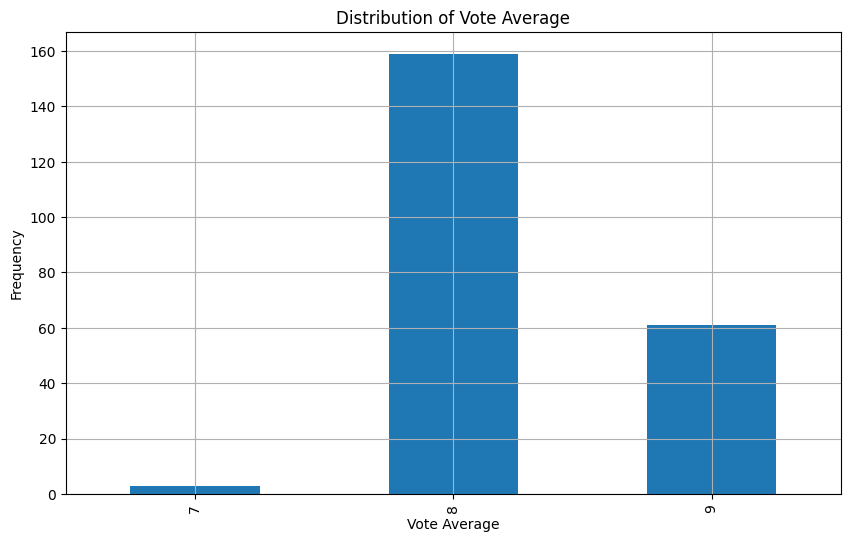

7      3
8    159
9     61
Name: vote_average, dtype: int64

In [50]:
import matplotlib.pyplot as plt

# Analyzing the distribution of the 'vote_average' column
vote_average_distribution = df['vote_average'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
vote_average_distribution.plot(kind='bar')
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

vote_average_distribution
